In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Load the data
train = np.loadtxt('./p2_train.csv', delimiter=',', skiprows=1) 
test = np.loadtxt('./p2_test.csv', delimiter=',', skiprows=1)

In [3]:
# Storing train and test data and dividing them into input and target variables
X_train, y_train = train[:, :-1], train[:, -1]  # input features and target variable
X_test, y_test = test[:, :-1], test[:, -1]  # input features and target variable

# Normalising data

In [4]:
def normalise(y):
    max = np.max(y)
    min = np.min(y)
    y_normalise = np.array([(x - min) / (max - min) for x in y])
    return y_normalise
X_train, X_test = normalise(X_train), normalise(X_test)
y_train, y_test = normalise(y_train), normalise(y_test)

# Power 4 for features of model 1, squaring arrays for model 2, Sin of arrays for model 3

In [5]:
def kernel_1(x, y):   
    x_1 = (x[:,0]*x[:,1])**2      
    x_2 = (x[:,2]*x[:,2])**2      
    x_3 = (x[:,2]*x[:,0])**2
    trans_x = np.array([x_1, x_2, x_3])
    return trans_x
def kernel_2(x, y):
    x_1 = ((x[:,0]))**2
    x_2 = ((x[:,1]))**2
    x_3 = ((x[:,2]))**2
    trans_x = np.array([x_1, x_2, x_3])
    return trans_x
def kernel_3(x, y):   
    x_1 = np.sin((x[:,0]))  
    x_2 = np.sin((x[:,1]))      
    x_3 = np.sin((x[:,2]))
    trans_x = np.array([x_1, x_2, x_3])
    return trans_x

In [6]:
# calling function and then transposing our array in train data
k1_train  = kernel_1(X_train, y_train) 
k1_train = k1_train.transpose()
k2_train  = kernel_2(X_train, y_train)
k2_train = k2_train.transpose()
k3_train  = kernel_3(X_train, y_train)
k3_train = k3_train.transpose()

In [7]:
# calling function and then transposing our array in test data
k1_test  = kernel_1(X_test, y_test) 
k1_test = k1_test.transpose()
k2_test  = kernel_2(X_test, y_test) 
k2_test = k2_test.transpose()
k3_test  = kernel_3(X_test, y_test) 
k3_test = k3_test.transpose()

In [8]:
# new train data with non linear features
train_1 = np.concatenate((X_train, k1_train),axis = 1)
train_2 = np.concatenate((X_train, k2_train),axis = 1)
train_3 = np.concatenate((X_train, k3_train),axis = 1)

In [9]:
# new test data with non linear features
test_1 = np.concatenate((X_test, k1_test),axis = 1)
test_2 = np.concatenate((X_test, k2_test),axis = 1)
test_3 = np.concatenate((X_test, k3_test),axis = 1)

# Model Building

In [10]:
# to calculate the loss
def loss(y,y_predicted):  
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [11]:
# code for "wx+b"
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product between weight and input
    return np.array(y_lst)

In [12]:
#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [13]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [14]:
# calculating the weight/model parameters values through our train data
def parameters(x,y):
    weight_vector = np.random.randn(x.shape[1])
    intercept = 0 
    alpha = 0.001 # learning rate
    epoch = 100 # no of iterations
    for i in range(epoch):
        y_predicted = predicted_y(weight_vector,x,intercept)
        weight_vector = weight_vector - alpha *dldw(x,y,y_predicted)  #update weight
        intercept = intercept - alpha * dldb(y,y_predicted)    #update bias   
    return intercept,weight_vector

# Model Errors 

In [15]:
# function to get errors and p-value
def errors(predictions, y_test):

    #calculating mean absolute error
    MAE = np.mean(np.abs(predictions - y_test))

    #calculating root mean square error
    MSE = np.square(np.subtract(y_test,predictions)).mean() 

    # calculating p-value
    n = y_test.shape[0]
    df = n - X_test.shape[1]  # degrees of freedom
    se = np.sqrt(np.sum((predictions - y_test) ** 2) / df)
    t = (predictions - y_test) / se
    p = 2 * (1 - stats.t.cdf(np.abs(t), df))
    
    return MAE, MSE, p

# Model 1

In [16]:
model_1 = parameters(train_1, y_train)

In [17]:
print(f"Intercept: {model_1[0]} and Parameters for square model: {model_1[1]}")

Intercept: -0.2258485599408675 and Parameters for square model: [ 0.93418064  0.45852524  0.99641384  0.45768543 -0.41658126  0.53683053]


In [18]:
# predicting on my test data by passing the parameters and storing it in y_new variable
y1 = predicted_y(model_1[1].tolist(),test_1,model_1[0])

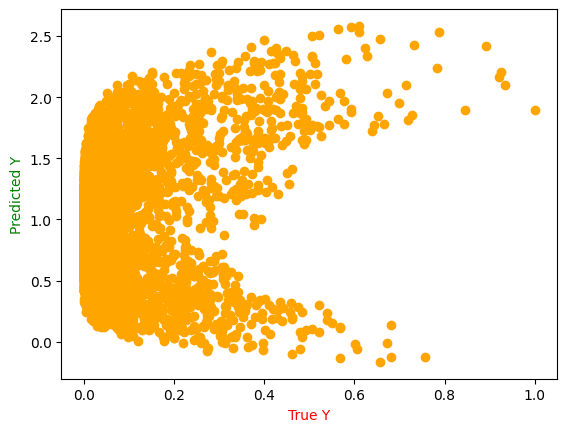

In [19]:
# Plot the predicted values against the true values on a scatter plot
plt.scatter(y_test, y1, color = 'orange')
plt.xlabel('True Y', color = "red")
plt.ylabel('Predicted Y',color = "green")
plt.show()

In [20]:
mae, mse, p = errors(y1, y_test)
print("Mean Absolute Error for model 1:", mae)
print("Mean Squared Error for model 1:", mse)
print("p-value for model 1:", p)

Mean Absolute Error for model 1: 0.9326728500932215
Mean Squared Error for model 1: 1.0709756717988113
p-value for model 1: [0.33532158 0.56563227 0.07447399 ... 0.46545692 0.3713848  0.06846041]


# Model 2

In [21]:
model_2 = parameters(train_2, y_train)

In [22]:
print(f"Intercept: {model_2[0]} and Parameters for model 2: {model_2[1]}")

Intercept: 0.0927880129884401 and Parameters for model 2: [ 0.75781394  0.1351616  -1.42890272 -0.81929763  0.68581993 -0.20836346]


In [23]:
# predicting on my test data by passing the parameters and storing it in y_new variable
y2 = predicted_y(model_2[1].tolist(),test_2,model_2[0])

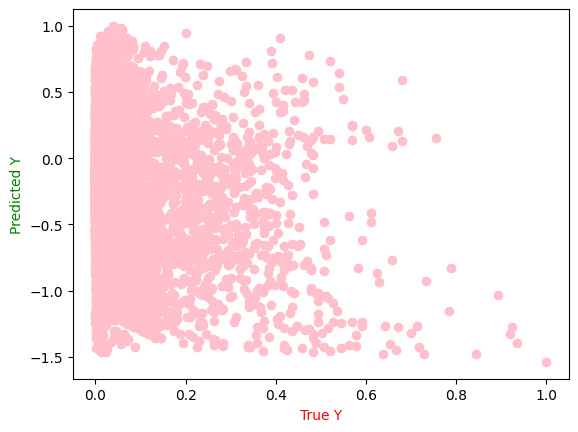

In [24]:
# Plot the predicted values against the true values on a scatter plot
plt.scatter(y_test, y2, color = 'pink')
plt.xlabel('True Y', color = "red")
plt.ylabel('Predicted Y',color = "green")
plt.show()

In [25]:
mae, mse, p = errors(y2, y_test)
print("Mean Absolute Error for model 2:", mae)
print("Mean Squared Error for model 2:", mse)
print("p-value for model 2:", p)

Mean Absolute Error for model 2: 0.5415961853424129
Mean Squared Error for model 2: 0.45813097827428717
p-value for model 2: [0.23400615 0.93209464 0.67077767 ... 0.4661577  0.61935311 0.20846392]


# Model 3 

In [26]:
model_3 = parameters(train_3, y_train)

In [27]:
print(f"Intercept: {model_3[0]} and Parameters for square model: {model_3[1]}")

Intercept: 0.1209213083308639 and Parameters for square model: [ 1.8810388  -0.72134126  0.7725456  -0.51537874 -3.04009832  0.29941533]


In [28]:
# predicting on my test data by passing the parameters and storing it in y_new variable
y3 = predicted_y(model_3[1].tolist(),test_3,model_3[0])

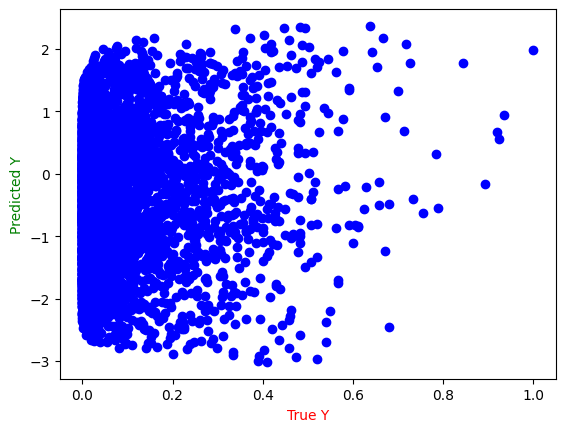

In [29]:
# Plot the predicted values against the true values on a scatter plot
plt.scatter(y_test, y3, color = 'blue')
plt.xlabel('True Y', color = "red")
plt.ylabel('Predicted Y',color = "green")
plt.show()

In [30]:
mae, mse, p = errors(y3, y_test)
print("Mean Absolute Error for model 3:", mae)
print("Mean Squared Error for model 3:", mse)
print("p-value for model 3:", p)

Mean Absolute Error for model 3: 0.9818141368885427
Mean Squared Error for model 3: 1.400802028996003
p-value for model 3: [0.80502988 0.93610482 0.25465366 ... 0.32007196 0.8222526  0.63969134]
